In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('customer segmentation.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [5]:
data.shape

(200, 5)

In [6]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [7]:
data.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

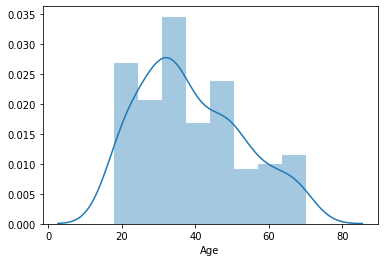

In [9]:
sns.distplot(data['Age'])

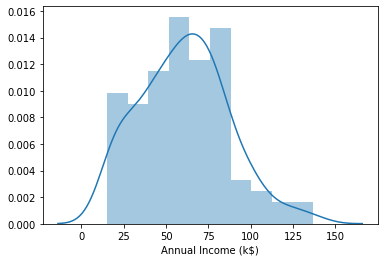

In [10]:
sns.distplot(data['Annual Income (k$)'])

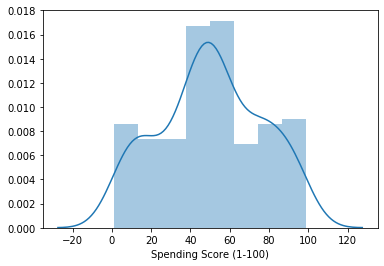

In [11]:
sns.distplot(data['Spending Score (1-100)'])

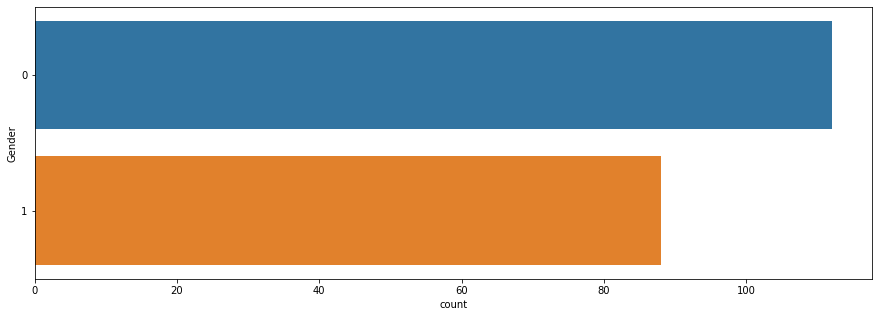

In [12]:
#making a count plot for gender
plt.figure(1,figsize=(15,5))
#figsize is to give values to height and width
sns.countplot(y='Gender',data=data)
plt.show()

In [13]:
#finding relationships between age,annual income,spending score
y=data['Age']
x1=data['Annual Income (k$)']

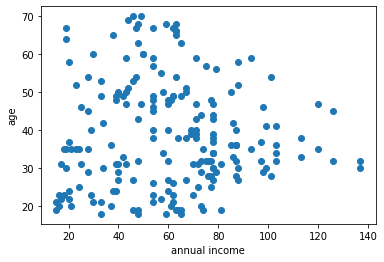

In [14]:
plt.scatter(x1,y)
plt.ylabel('age')
plt.xlabel('annual income')
plt.show()

In [15]:
x=data.copy()


In [16]:
kmeans=KMeans(2)

In [17]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
cluster=x.copy()

In [19]:
cluster['predict']=kmeans.fit_predict(x)

In [20]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled


array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

In [21]:

wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    wcss

Text(0, 0.5, 'wcss')

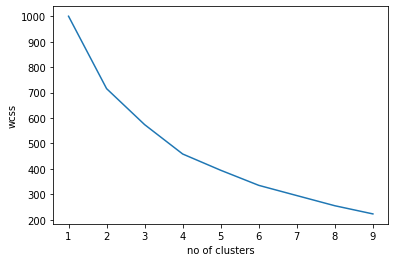

In [22]:
plt.plot(range(1,10),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss')

In [23]:
kmeans_new=KMeans(2)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new['predict']=kmeans_new.predict(x_scaled)

In [24]:
cluster_new

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predict
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,0
197,198,1,32,126,74,0
198,199,1,32,137,18,0


Text(0, 0.5, 'age')

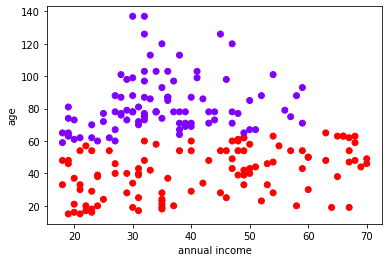

In [25]:
plt.scatter(cluster_new['Age'],cluster_new['Annual Income (k$)'],c=cluster_new['predict'],cmap='rainbow')
plt.xlabel('annual income')
plt.ylabel('age')

In [36]:
kmeans_new=KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new['predict']=kmeans_new.predict(x_scaled)

In [37]:
cluster_new

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predict
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


Text(0, 0.5, 'age')

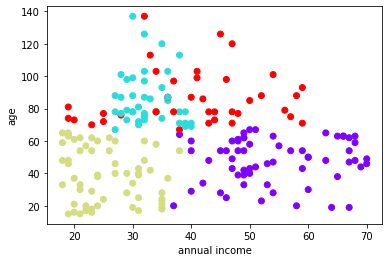

In [38]:
plt.scatter(cluster_new['Age'],cluster_new['Annual Income (k$)'],c=cluster_new['predict'],cmap='rainbow')
plt.xlabel('annual income')
plt.ylabel('age')

Text(0, 0.5, 'spending score')

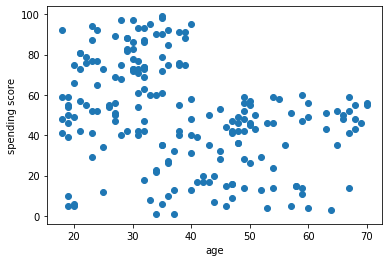

In [41]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.xlabel('age')
plt.ylabel('spending score')

In [42]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    wcss

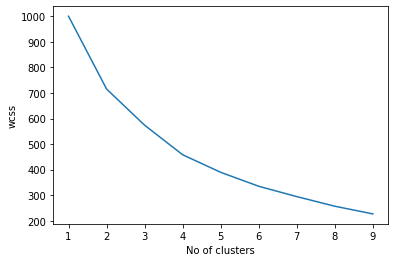

In [43]:
plt.plot(range(1,10),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [49]:
kmeans_new=KMeans(2)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new['predict']=kmeans_new.predict(x_scaled)


Text(0, 0.5, 'spending score')

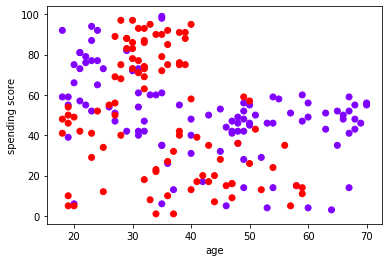

In [50]:
plt.scatter(cluster_new['Age'],cluster_new['Spending Score (1-100)'],c=cluster_new['predict'],cmap='rainbow')
plt.xlabel('age')
plt.ylabel('spending score')

In [51]:
kmeans_new=KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new['predict']=kmeans_new.predict(x_scaled)


Text(0, 0.5, 'Spending score')

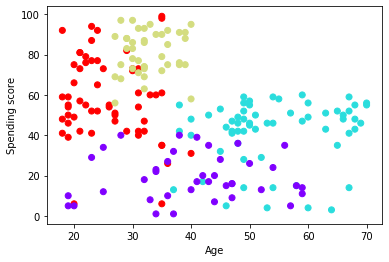

In [53]:
plt.scatter(cluster_new['Age'],cluster_new['Spending Score (1-100)'],c=cluster_new['predict'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending score')

In [59]:
kmeans=KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new['predict']=kmeans_new.predict(x_scaled)

Text(0, 0.5, 'spending score')

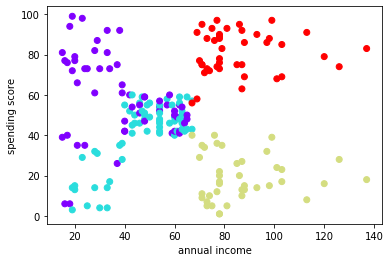

In [60]:
plt.scatter(cluster_new['Annual Income (k$)'],cluster_new['Spending Score (1-100)'],c=cluster_new['predict'],cmap='rainbow')
plt.xlabel('annual income')
plt.ylabel('spending score')

In [61]:
kmeans_new=KMeans(2)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new['predict']=kmeans_new.predict(x_scaled)

Text(0, 0.5, 'age')

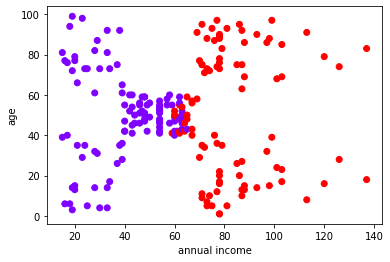

In [62]:
plt.scatter(cluster_new['Annual Income (k$)'],cluster_new['Spending Score (1-100)'],c=cluster_new['predict'],cmap='rainbow')
plt.xlabel('annual income')
plt.ylabel('age')

In [63]:
kmeans_new=KMeans(3)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new['predict']=kmeans_new.predict(x_scaled)

Text(0, 0.5, 'age')

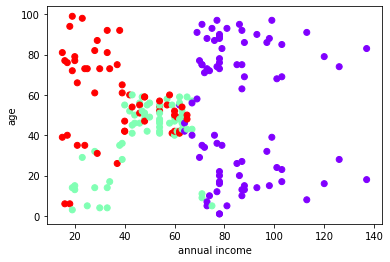

In [64]:
plt.scatter(cluster_new['Annual Income (k$)'],cluster_new['Spending Score (1-100)'],c=cluster_new['predict'],cmap='rainbow')
plt.xlabel('annual income')
plt.ylabel('age')